In [218]:
%matplotlib widget 

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sympy as sp
from IPython.display import Latex
import scipy.constants as sc
import CoolProp as cp
import matplotlib as mpl
import ht

mpl.rcParams['lines.markersize'] = 9

## Problema: Regeneradores

Una cooperativa ha desarrollado un material de fibras empaquetadas de forma aleatoria que podría ser utilizado como un relleno para un regenerador. Actualmente no existen correlaciones disponibles que permitan predecir el coeficiente de transferencia de calor para el empaquetado. Por lo tanto, se han llevado a cabo una serie de pruebas para medir el coeficiente de transferencia de calor. Se llena un lecho con un diámetro $D_{\text{bed}} = 2 \, \text{cm}$ con estas fibras; el diámetro de las fibras individuales es $d_{\text{fiber}} = 200 \, \mu\text{m}$. La temperatura y presión nominales utilizadas para llevar a cabo la prueba son $T_{\text{nom}} = 20^\circ\text{C}$ y $p_{\text{nom}} = 101.3 \, \text{kPa}$, respectivamente. El caudal másico del fluido de prueba, $\dot{m}$, se varía y se mide el coeficiente de transferencia de calor. Se utilizan varios fluidos, incluyendo aire, agua y etanol, para las pruebas. Los datos se muestran en la tabla siguiente:

| Caudal másico (kg/s) | Coef. Transferencia (W/m^2·K) | Caudal másico (kg/s) | Coef. Transferencia (W/m^2·K) | Caudal másico (kg/s) | Coef. Transferencia (W/m^2·K) |
|----------------------|-------------------------------|----------------------|-------------------------------|----------------------|-------------------------------|
| 0.0001454            | 170.7                         | 0.00787              | 8464                           | 0.009124             | 4162                          |
| 0.0004073            | 311.9                         | 0.02204              | 15470                         | 0.02555              | 7607                          |
| 0.0006691            | 413.7                         | 0.0362               | 20515                         | 0.04197              | 10088                         |
| 0.0009309            | 491.8                         | 0.05037              | 24391                         | 0.05839              | 11993                         |
| 0.001193             | 572.7                         | 0.06454              | 28399                         | 0.07481              | 13964                         |
| 0.001454             | 631.1                         | 0.07878              | 31296                         | 0.09124              | 15388                         |

1. Representar en un gráfico el coeficiente de transferencia de calor en función de la tasa de flujo másico para los tres diferentes fluidos de prueba.
2. Graficar el número de Nusselt en función del número de Reynolds para los tres diferentes fluidos de prueba. Utilizar el diámetro de la fibra como longitud característica y la velocidad de flujo libre (es decir, la velocidad en el lecho si estuviera vacío) como la velocidad característica.
3. Correlacionar los datos para todos los fluidos usando una función de la forma: $Nu = a \cdot \text{Re}^b \cdot \text{Pr}^c$. *Pista: si usa una escala logarítmica, la relación es lineal.*
4. Usando lo hallado en el punto 3, estime el coeficiente de transferencia de calor para 20 kg/s de aceite pasando a través de un lecho de 50 cm de diámetro compuesto por fibras con un diámetro de 2 mm. Elija un aceite comercial de su preferencia.


In [203]:
Dlecho = 2e-2
Dfibra = 200e-6
data_csv = pd.read_csv('data_regeneradores.csv').to_numpy()
m1,m2,m3 = data_csv[:,::2].T
h1,h2,h3 = data_csv[:,1::2].T

Text(0, 0.5, '$h_{conv}$')

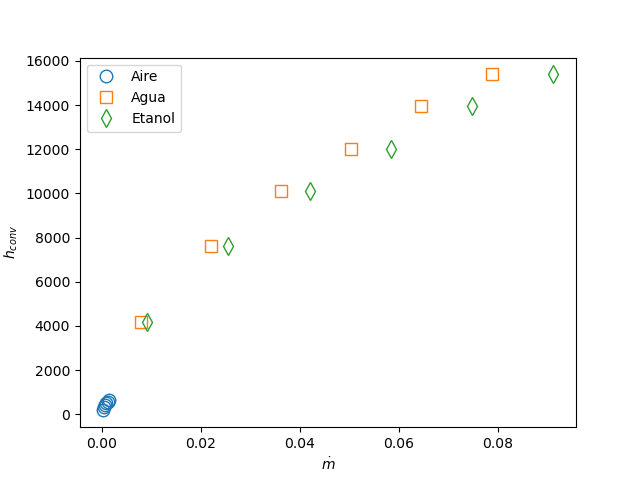

In [204]:
fig,ax = plt.subplots()
ax.plot(m1,h1,'o',label='Aire',fillstyle='none')
ax.plot(m2,h3,'s',label='Agua',fillstyle='none')
ax.plot(m3,h3,'d',label='Etanol',fillstyle='none')
ax.legend()
ax.set_xlabel('$\dot m$')
ax.set_ylabel('$h_{conv}$')

In [205]:
Tref = 20+273
pref = 101.3e3
A_lecho = Dlecho**2*np.pi/4
rho_1 = cp.CoolProp.PropsSI('D','T',Tref,'P',pref,'Air')
mu_1 = cp.CoolProp.PropsSI('V','T',Tref,'P',pref,'Air')
nu_1 = mu_1/rho_1
k_1 = cp.CoolProp.PropsSI('L','T',Tref,'P',pref,'Air')
Pr_1 = cp.CoolProp.PropsSI('PRANDTL','T',Tref,'P',pref,'Air')

rho_2 = cp.CoolProp.PropsSI('D','T',Tref,'P',pref,'Water')
mu_2 = cp.CoolProp.PropsSI('V','T',Tref,'P',pref,'Water')
nu_2 = mu_2/rho_2
k_2 = cp.CoolProp.PropsSI('L','T',Tref,'P',pref,'Water')
Pr_2 = cp.CoolProp.PropsSI('PRANDTL','T',Tref,'P',pref,'Water')

rho_3 = cp.CoolProp.PropsSI('D','T',Tref,'P',pref,'Ethanol')
mu_3 = cp.CoolProp.PropsSI('V','T',Tref,'P',pref,'Ethanol')
nu_3 = mu_3/rho_3
k_3 = cp.CoolProp.PropsSI('L','T',Tref,'P',pref,'Ethanol')
Pr_3 = cp.CoolProp.PropsSI('PRANDTL','T',Tref,'P',pref,'Ethanol')


Re_1 = m1 / rho_1 /A_lecho * Dfibra / nu_1
Nu_1 = h1 / k_1*Dfibra

Re_2 = m2 / rho_2 /A_lecho * Dfibra / nu_2
Nu_2 = h2 / k_2*Dfibra

Re_3 = m2 / rho_3 /A_lecho * Dfibra / nu_3
Nu_3 = h3 / k_3*Dfibra



In [206]:
k_1,k_2,k_3

(0.0258625955776194, 0.597746764118584, 0.16452819205462582)

Text(0, 0.5, 'Nu')

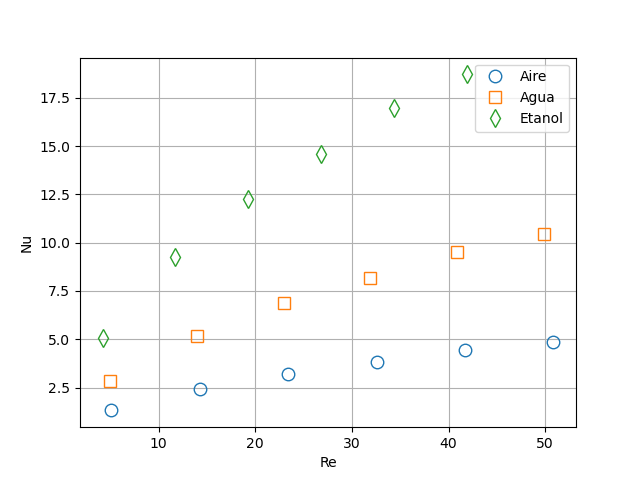

In [207]:
fig,ax = plt.subplots()
ax.plot(Re_1,Nu_1,'o',label='Aire',fillstyle='none')
ax.plot(Re_2,Nu_2,'s',label='Agua',fillstyle='none')
ax.plot(Re_3,Nu_3,'d',label='Etanol',fillstyle='none')
ax.legend()
ax.grid()
ax.set_xlabel('Re')
ax.set_ylabel('Nu')

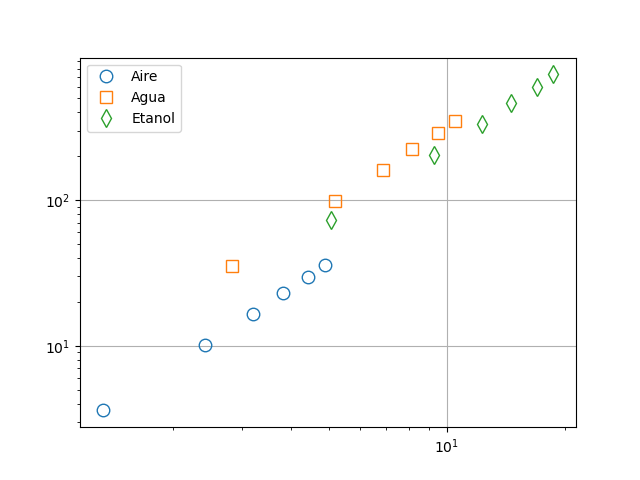

In [208]:
fig,ax = plt.subplots()
ax.loglog(Nu_1,Re_1*Pr_1,'o',label='Aire',fillstyle='none')
ax.loglog(Nu_2,Re_2*Pr_2,'s',label='Agua',fillstyle='none')
ax.loglog(Nu_3,Re_3*Pr_3,'d',label='Etanol',fillstyle='none')
ax.legend()
ax.grid()

In [209]:
A = np.ones((6*3,3))
A[:,1] = np.hstack((np.log(Re_1),np.log(Re_2),np.log(Re_3)))
Re_s = np.exp(A[:,1])
A[:6,2] =  A[:6,2]*np.log(Pr_1)
A[6:12,2] =  A[6:12,2]*np.log(Pr_2)
A[12:,2] =  A[12:,2]*np.log(Pr_3)
Pr_s = np.exp(A[:,2])
b = np.hstack((np.log(Nu_1),np.log(Nu_2),np.log(Nu_3)))
Nu_s = np.exp(b)

$Nu_D = \left(0.4 Re_D^{0.5}+0.06Re_D^{2/3}\right)Pr^{0.4}$
Whitaker (1972)

In [ ]:
Nu_sph = 2+(0.4*Re_s**0.5+0.06*Re_s**(2/3))*Pr_s**0.4

In [210]:
m = np.linalg.lstsq(A,b,rcond=None)
a1,b1,c1 = m[0]

Text(0, 0.5, '$a Re^bPr^c$')

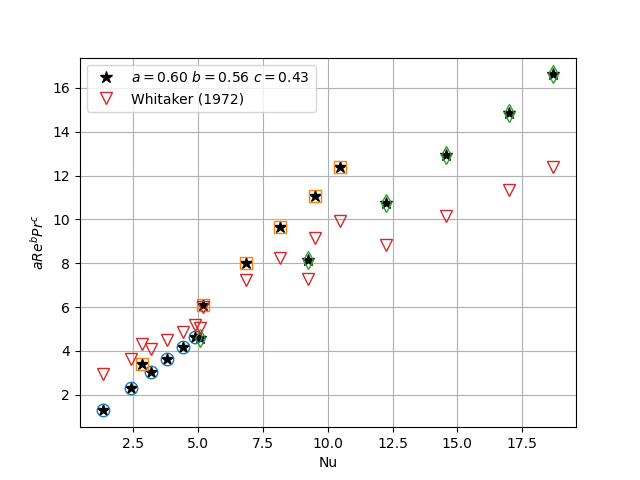

In [225]:
fig,ax = plt.subplots()
ax.plot(Nu_s,np.exp(a1)*Re_s**b1*Pr_s**c1,'k*',label=f'$a={np.exp(a1):.2f}$ $b={b1:.2f}$ $c={c1:.2f}$')

ax.plot(Nu_1,np.exp(a1)*Re_1**b1*Pr_1**c1,'o',fillstyle='none')
ax.plot(Nu_2,np.exp(a1)*Re_2**b1*Pr_2**c1,'s',fillstyle='none')
ax.plot(Nu_3,np.exp(a1)*Re_3**b1*Pr_3**c1,'d',fillstyle='none')
ax.plot(Nu_s,Nu_sph,'v',fillstyle='none',label='Whitaker (1972)')
ax.legend()
ax.grid()
ax.set_xlabel('Nu')
ax.set_ylabel('$a Re^bPr^c$')

In [213]:
Pr_1

0.707975829167235

In [226]:
Re_s

array([ 5.08641712, 14.24826475, 23.40661415, 32.56496355, 41.73380762,
       50.86417123,  4.98384675, 13.95730399, 22.92442851, 31.89788574,
       40.87134298, 49.88912922,  4.1843859 , 11.71840726, 19.24711174,
       26.7811331 , 34.31515447, 41.886394  ])